## **LIBRARY IMPORTATION**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from scipy import stats

# **LOADING OF DATASET**

In [2]:
data = pd.read_csv('final_depression_dataset_1.csv')

In [3]:
# HEAD OF DATA
data.head(2)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No


In [4]:
# COUNT ROWS AND COLUMNS
print(f'''NUMBER OF ROWS = {data.shape[0]}
NUMBER OF COLUMNS = {data.shape[1]}''')

NUMBER OF ROWS = 2556
NUMBER OF COLUMNS = 19


### **BASIC INFORMATION OF DATA**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   2556 non-null   object 
 1   Gender                                 2556 non-null   object 
 2   Age                                    2556 non-null   int64  
 3   City                                   2556 non-null   object 
 4   Working Professional or Student        2556 non-null   object 
 5   Profession                             1883 non-null   object 
 6   Academic Pressure                      502 non-null    float64
 7   Work Pressure                          2054 non-null   float64
 8   CGPA                                   502 non-null    float64
 9   Study Satisfaction                     502 non-null    float64
 10  Job Satisfaction                       2054 non-null   float64
 11  Slee

### **DESCRIPTIVE ANALYSIS**

In [6]:
data.describe().T # THIS WILL GIVE INFORMATION ABOUT NUMERICAL COLUMN ONLY

,count,mean,std,min,25%,50%,75%,max
Age,2556.0,39.043036,12.260596,18.00,28.00,39.000,50.000,60.0
Academic Pressure,502.0,3.003984,1.390007,1.00,2.00,3.000,4.000,5.0
Work Pressure,2054.0,3.021908,1.417312,1.00,2.00,3.000,4.000,5.0
CGPA,502.0,7.567809,1.465367,5.03,6.21,7.605,8.825,10.0
Study Satisfaction,502.0,3.075697,1.373490,1.00,2.00,3.000,4.000,5.0
Job Satisfaction,2054.0,3.015093,1.418432,1.00,2.00,3.000,4.000,5.0
Work/Study Hours,2556.0,6.023865,3.771743,0.00,3.00,6.000,9.000,12.0
Financial Stress,2556.0,2.968701,1.415527,1.00,2.00,3.000,4.000,5.0


In [7]:
# DEFINING CATEGORICAL COLUMN
data.describe(include=object).T # THIS WILL TELLS US ABOUT CATEGORICAL COLUMN

,count,unique,top,freq
Name,2556,216,Rohan,26
Gender,2556,2,Male,1333
City,2556,30,Srinagar,102
Working Professional or Student,2556,2,Working Professional,2054
Profession,1883,35,Teacher,322
Sleep Duration,2556,4,7-8 hours,658
Dietary Habits,2556,3,Unhealthy,882
Degree,2556,27,Class 12,275
Have you ever had suicidal thoughts ?,2556,2,No,1307
Family History of Mental Illness,2556,2,No,1311


In [8]:
data.isnull().sum()

Name                                        0
Gender                                      0
Age                                         0
City                                        0
Working Professional or Student             0
Profession                                673
Academic Pressure                        2054
Work Pressure                             502
CGPA                                     2054
Study Satisfaction                       2054
Job Satisfaction                          502
Sleep Duration                              0
Dietary Habits                              0
Degree                                      0
Have you ever had suicidal thoughts ?       0
Work/Study Hours                            0
Financial Stress                            0
Family History of Mental Illness            0
Depression                                  0
dtype: int64

## **CORRELATION**

<Axes: >

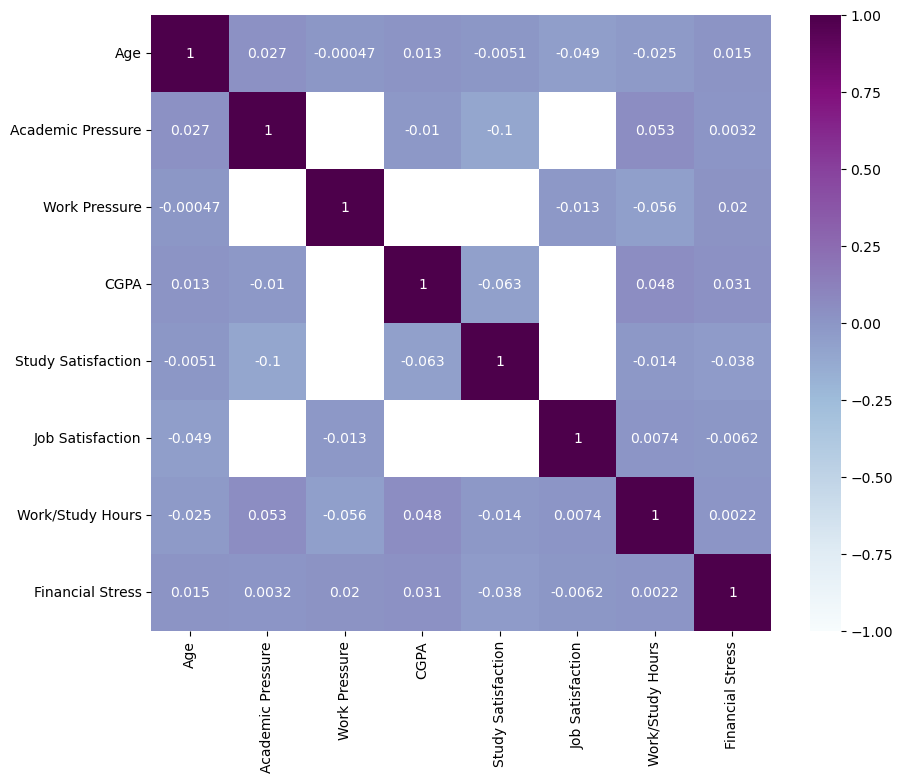

In [9]:
# EXPLORING THE CORRELATION BETWEEN ALL THE NUMERIC COLUMNS VIA HEATMAP

plt.figure(figsize = (10,8))
sns.heatmap(data=data.corr(numeric_only=True), vmin = -1, vmax = 1, annot = True, cmap = 'BuPu', linecolor= 'black')

# **DATA VISUALIZATION**

In [10]:
data.tail()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No
2555,Kiran,Male,18,Surat,Student,NaN,5.0,NaN,6.7,3.0,NaN,More than 8 hours,Unhealthy,Class 12,No,6,2,Yes,Yes


In [11]:
data_wp = data[data['Working Professional or Student'] == 'Working Professional']

In [12]:
data_wp = data_wp.drop(columns = ['Study Satisfaction', 'Academic Pressure','CGPA'])

In [13]:
data_wp.tail()

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2550,Prisha,Female,45,Srinagar,Working Professional,Teacher,1.0,3.0,Less than 5 hours,Healthy,LLM,Yes,2,5,Yes,No
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,1.0,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,3.0,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,1.0,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,2.0,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [14]:
data_wp.isnull().sum()

Name                                       0
Gender                                     0
Age                                        0
City                                       0
Working Professional or Student            0
Profession                               171
Work Pressure                              0
Job Satisfaction                           0
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                           0
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
dtype: int64

In [15]:
data_stud = data[data['Working Professional or Student'] == 'Student']

In [16]:
data_stud = data_stud.drop(columns = ['Job Satisfaction', 'Work Pressure','Profession'])

In [17]:
data_stud.tail()

,Name,Gender,Age,City,Working Professional or Student,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
2525,Siddharth,Male,26,Indore,Student,5.0,10.00,2.0,More than 8 hours,Unhealthy,B.Com,No,8,3,No,Yes
2538,Nikhil,Male,24,Jaipur,Student,2.0,6.39,1.0,Less than 5 hours,Unhealthy,MCA,Yes,8,5,No,Yes
2539,Rashi,Female,23,Bhopal,Student,3.0,8.46,5.0,5-6 hours,Healthy,MBA,No,1,5,Yes,No
2545,Rupak,Male,33,Agra,Student,4.0,6.89,4.0,More than 8 hours,Healthy,B.Arch,No,8,1,Yes,No
2555,Kiran,Male,18,Surat,Student,5.0,6.70,3.0,More than 8 hours,Unhealthy,Class 12,No,6,2,Yes,Yes


In [18]:
data_stud.isnull().sum()

Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Academic Pressure                        0
CGPA                                     0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

SO NOW, THIS DOES NOT HAVE ANY NULL VALUES IN ANY OF THE COLUMNS

Depression
No     0.901168
Yes    0.098832
Name: proportion, dtype: float64


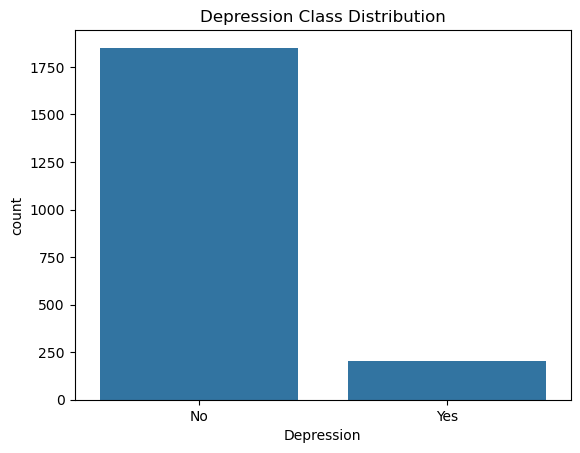

In [19]:
#Target Variable Analysis (Depression) ----
# Check class balance for the target variable
print(data_wp['Depression'].value_counts(normalize=True))
sns.countplot(x='Depression', data=data_wp)
plt.title('Depression Class Distribution')
plt.show()

# **UNIVARIATE ANALYSIS OF STUDENT'S DATA**

In [20]:
# Separate the numerical and categorical columns

data_stud.columns

num_col = ['Age','Work/Study Hours','CGPA']
cat_col = ['Gender','Academic Pressure','Study Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress', 'Depression']

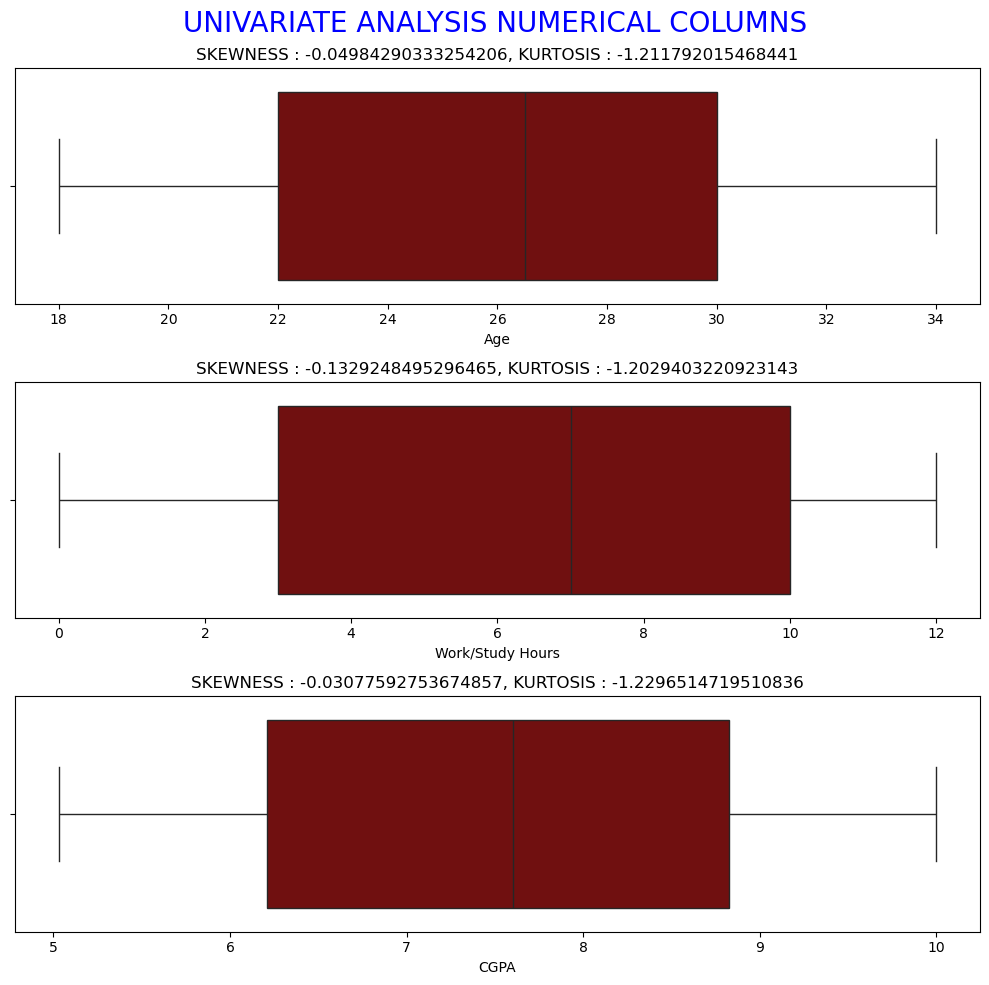

In [21]:
# Explore the numerical column via boxplot
t = 1
plt.figure(figsize = (10,10))
plt.suptitle('UNIVARIATE ANALYSIS NUMERICAL COLUMNS', fontsize = 20, color = 'Blue')
for i in num_col:
    s,k = data_stud[i].skew(), data_stud[i].kurt()
    plt.subplot(3,1,t)
    sns.boxplot(data = data_stud, x = i, fill = True, color = 'maroon')
    plt.title(f'SKEWNESS : {s}, KURTOSIS : {k}')
    t = t+1

plt.tight_layout()
plt.show()

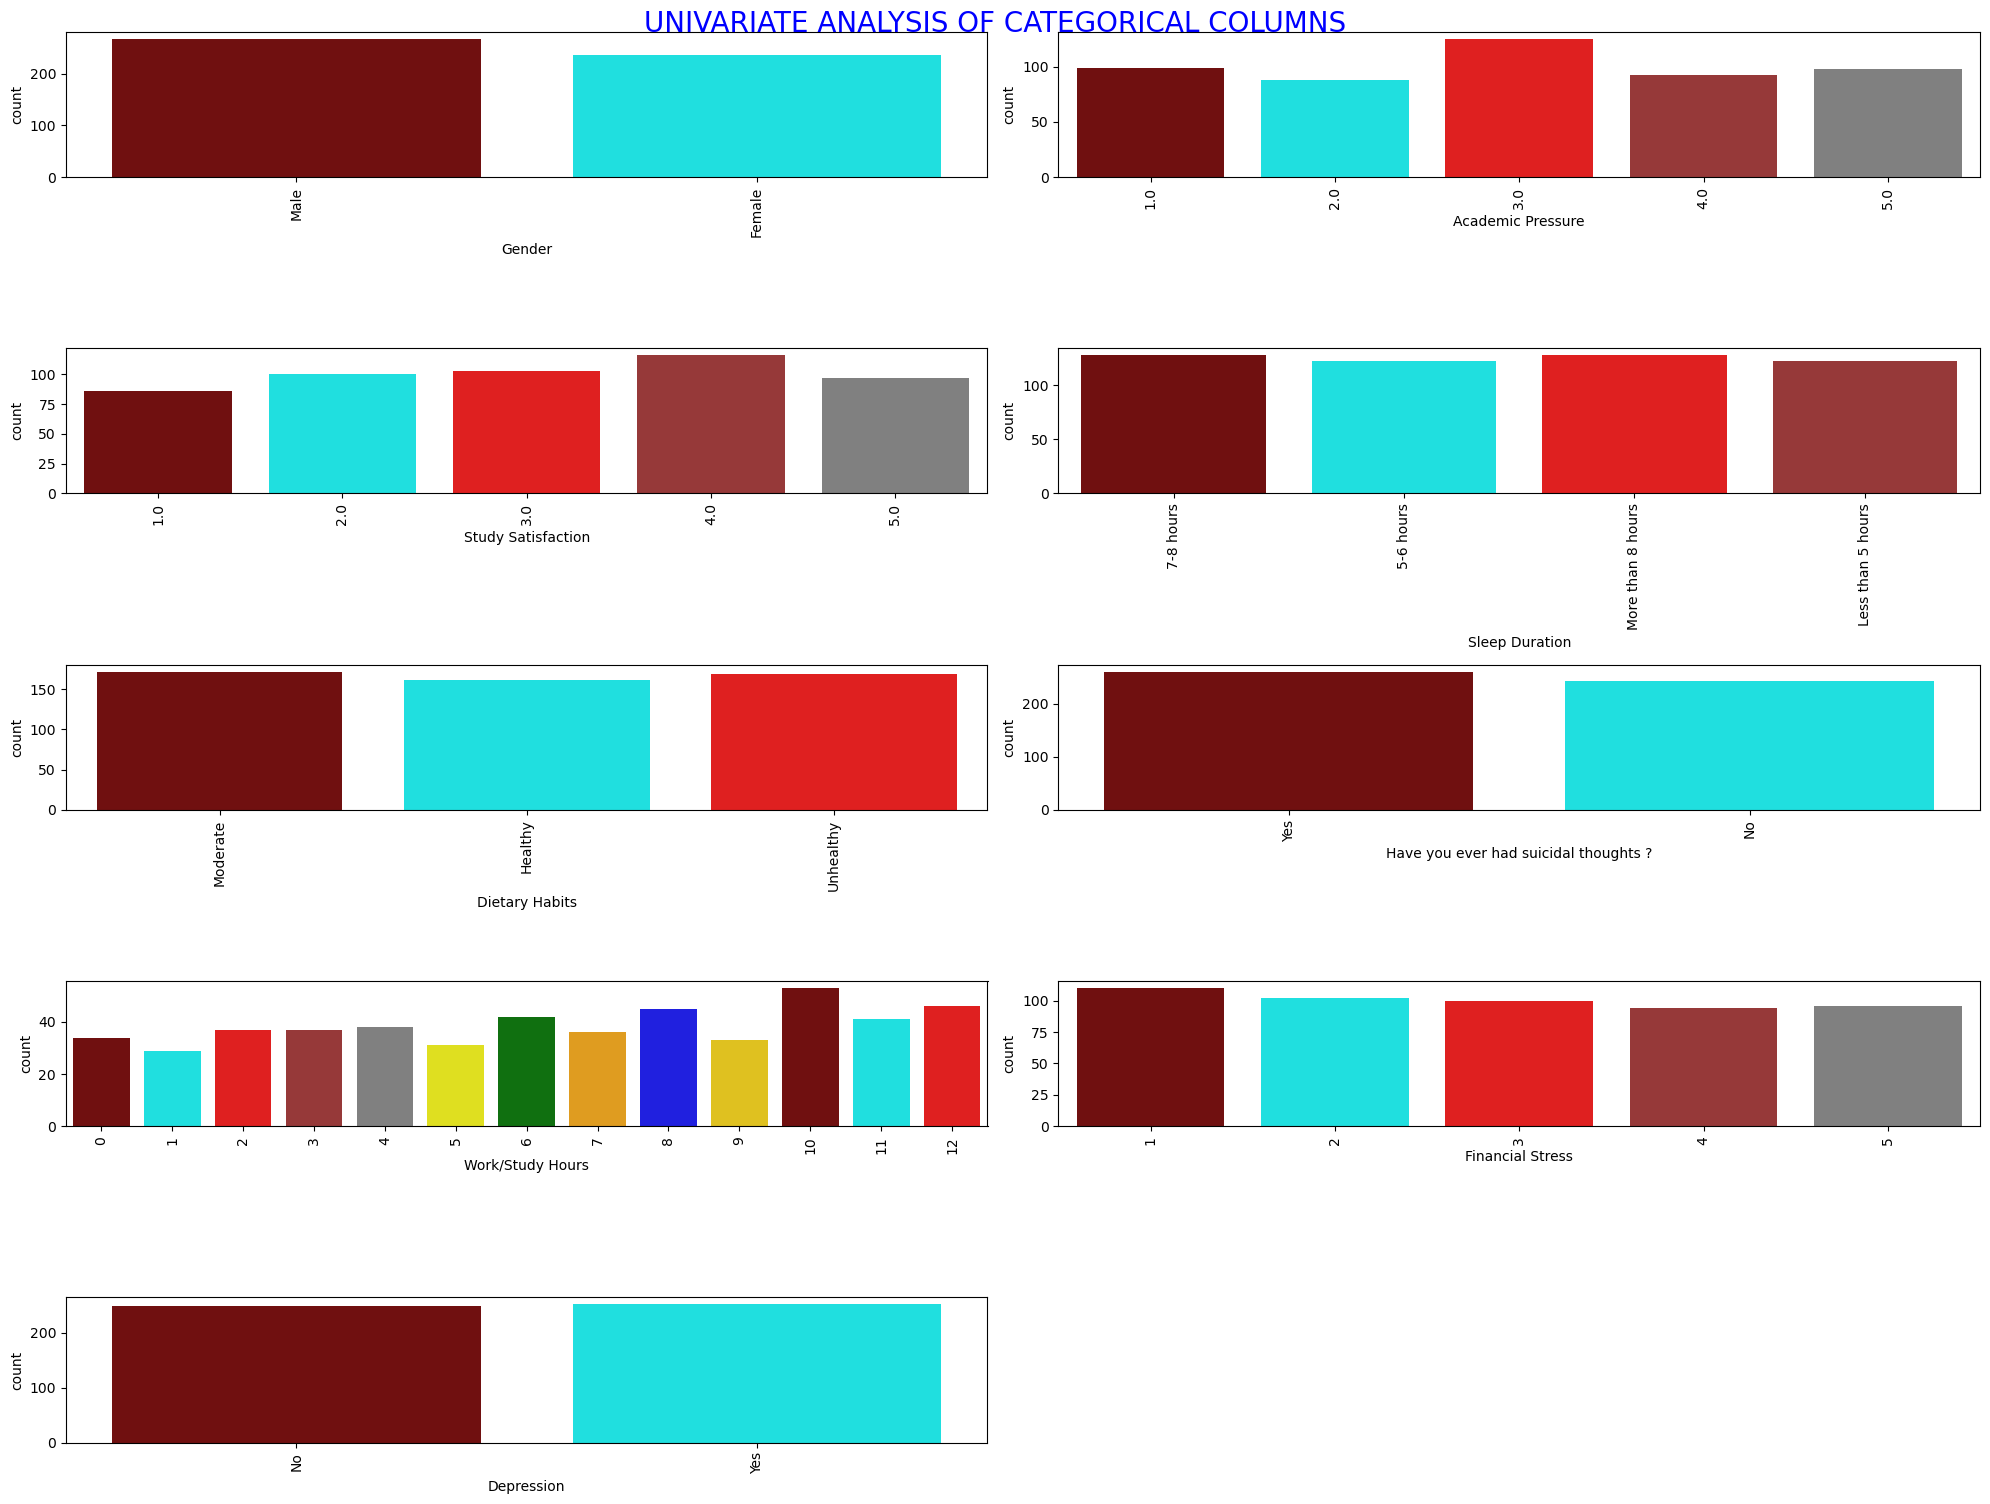

In [22]:
# Explore the categorical column by CountPlot
t =1
plt.figure(figsize = (20,18))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS', fontsize= 20, color = 'Blue')
for i in cat_col:
    plt.subplot(6,2,t)
    sns.countplot(data = data_stud, x = i, palette=['maroon', 'aqua','red', 'brown', 'grey', 'yellow', 'green', 'orange', 'blue', 'gold'])
    plt.xticks(rotation = 90)
    t = t+1

plt.tight_layout()
plt.show()

# **UNIVARIATE ANALYSIS OF WORKING PROFESSIONAL'S DATA**

In [23]:
# Separate the numerical and categorical columns

data_wp.columns

num_cols = ['Age','Work/Study Hours']
cat_cols = ['Gender','Work Pressure','Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Financial Stress',
       'Family History of Mental Illness', 'Depression']

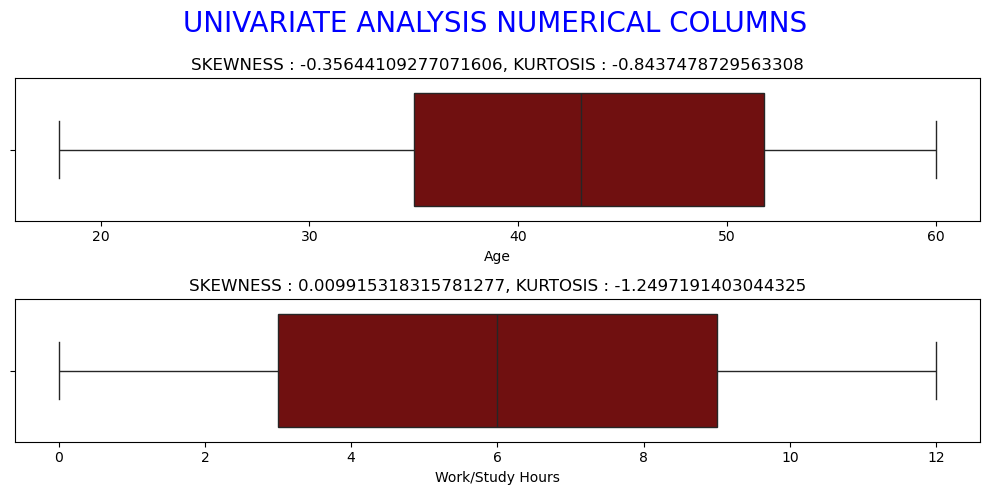

In [24]:
# Explore the numerical column via boxplot
t = 1
plt.figure(figsize = (10,5))
plt.suptitle('UNIVARIATE ANALYSIS NUMERICAL COLUMNS', fontsize = 20, color = 'Blue')
for i in num_cols:
    s,k = data_wp[i].skew(), data_wp[i].kurt()
    plt.subplot(2,1,t)
    sns.boxplot(data = data_wp, x = i, fill = True, color = 'maroon')
    plt.title(f'SKEWNESS : {s}, KURTOSIS : {k}')
    t = t+1

plt.tight_layout()
plt.show()

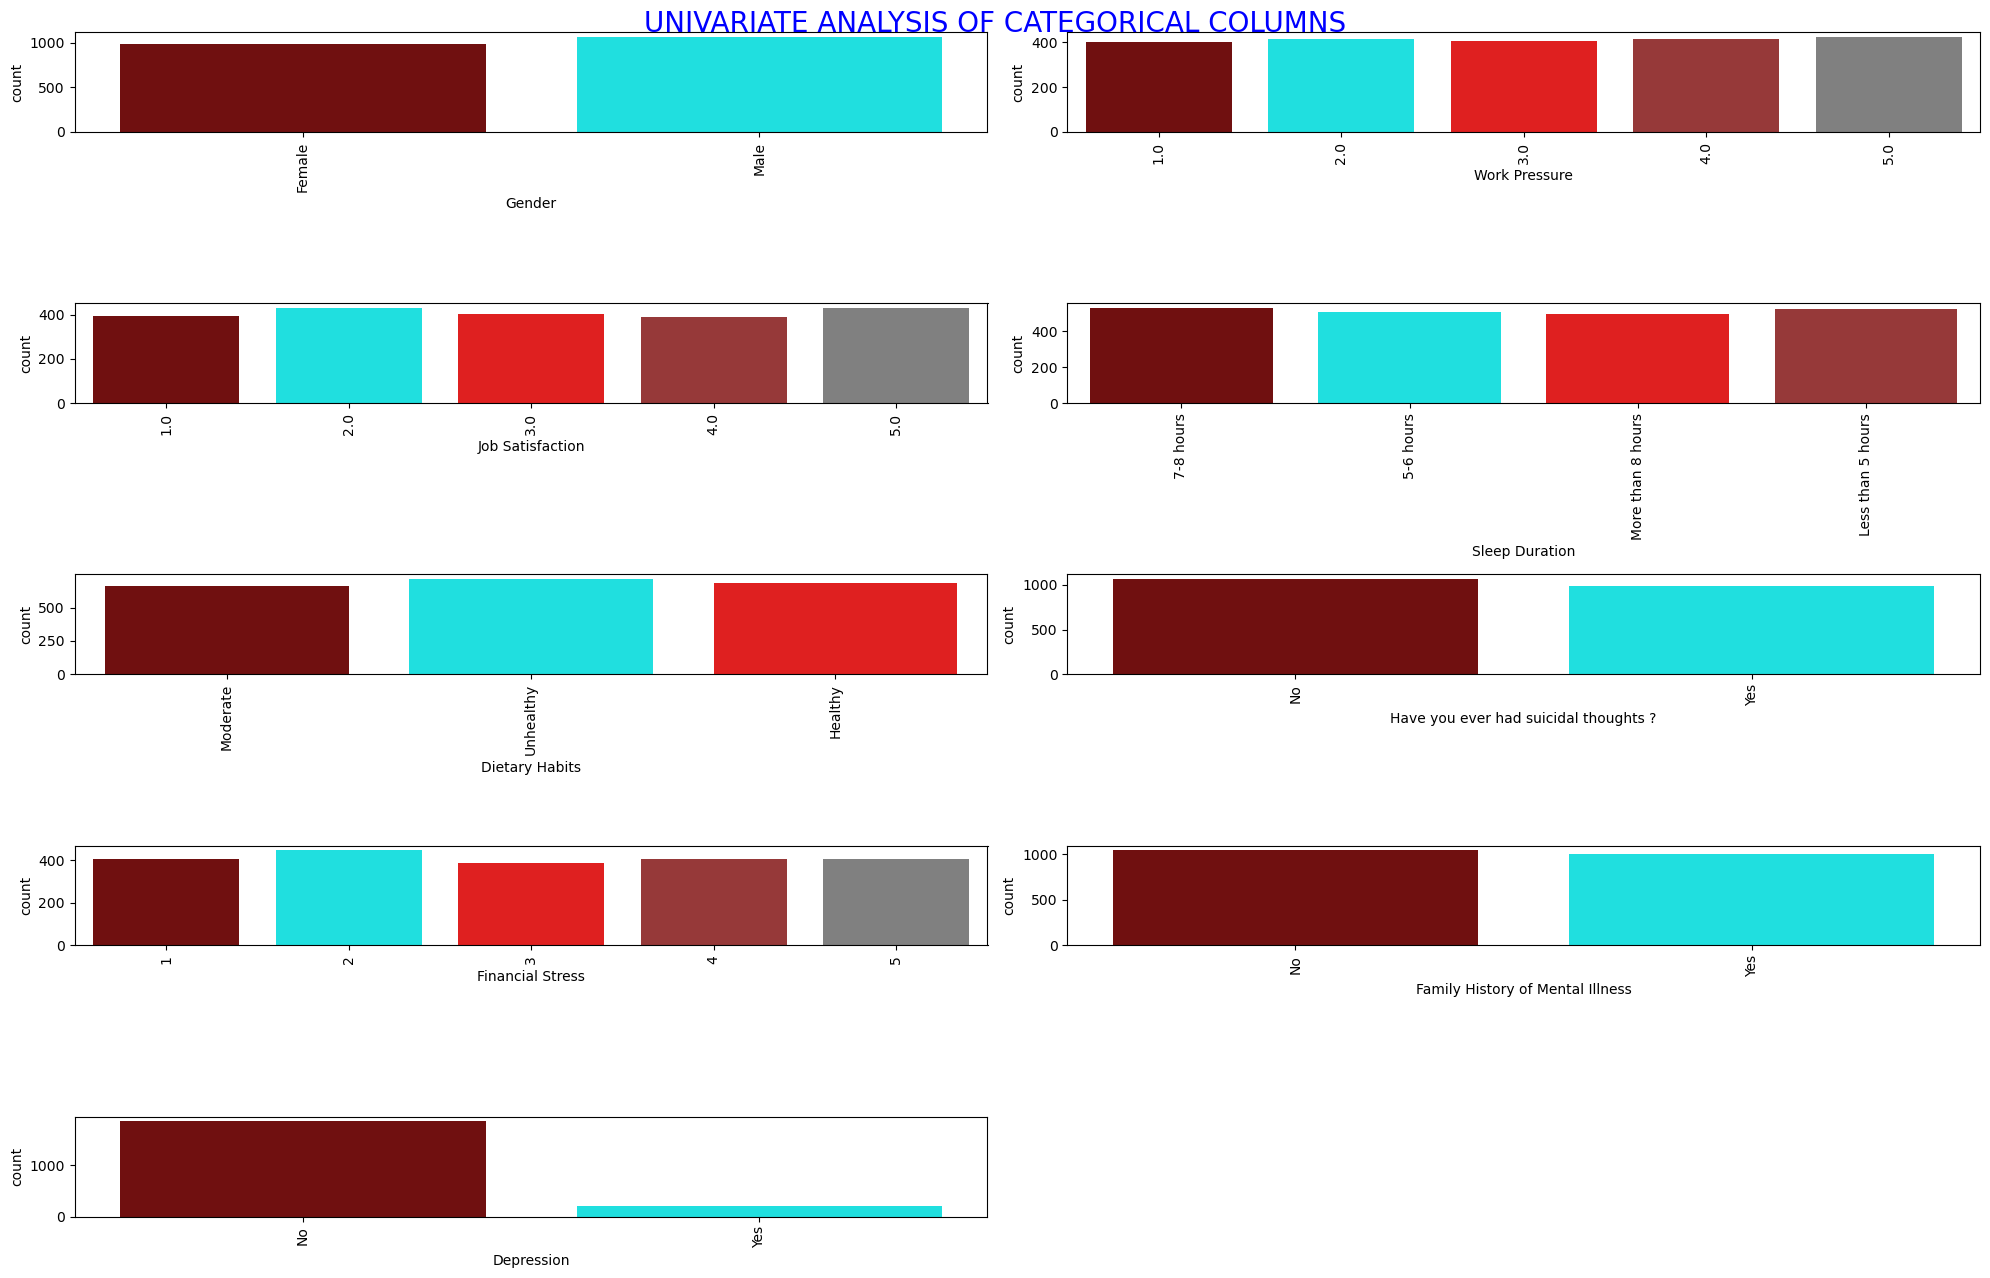

In [25]:
# Explore the categorical column by CountPlot
t =1
plt.figure(figsize = (20,18))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS', fontsize= 20, color = 'Blue')
for i in cat_cols:
    plt.subplot(7,2,t)
    sns.countplot(data = data_wp, x = i, palette=['maroon', 'aqua','red', 'brown', 'grey', 'yellow', 'green', 'orange', 'blue', 'gold'])
    plt.xticks(rotation = 90)
    t = t+1

plt.tight_layout()
plt.show()

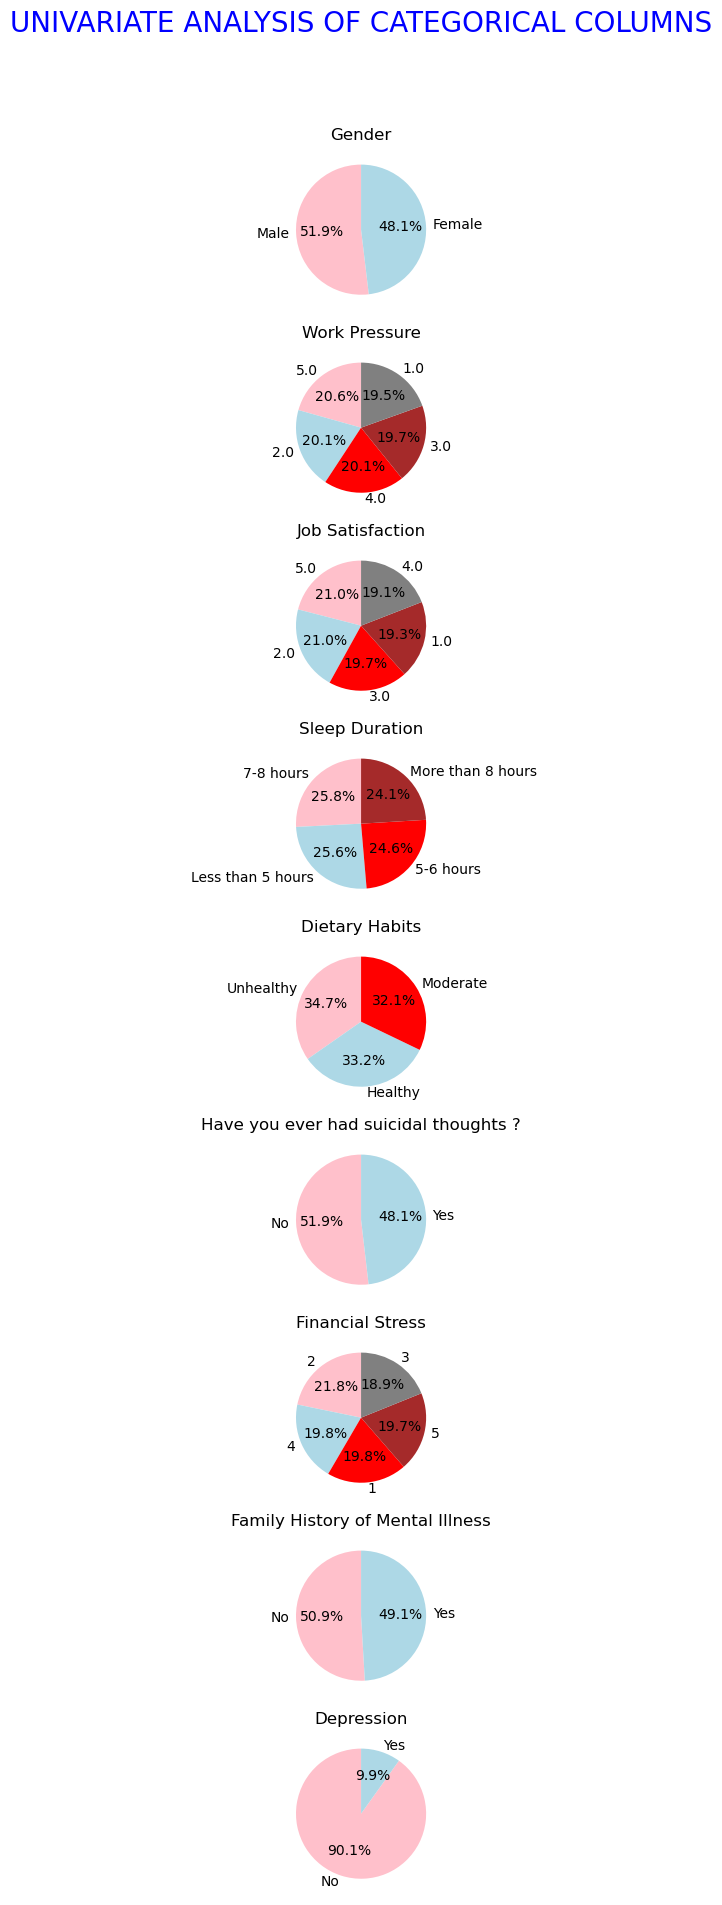

In [26]:
# Set up the figure and layout
t = 1
plt.figure(figsize=(25, 20))
plt.suptitle('UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS', fontsize=20, color='Blue')

# Loop through each categorical column to create pie charts
for i in cat_cols:
    plt.subplot(9, 1, t)  # Adjust grid size based on number of columns
    data_wp[i].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
        colors=['pink', 'lightblue', 'red', 'brown', 'grey', 'yellow', 'green', 'orange', 'blue', 'gold'])
    plt.title(i)  # Set title to the column name
    plt.ylabel('')  # Remove y-axis label for a cleaner look
    t += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

# **BIVARIATE ANALYSIS OF WORKING PROFESSIONAL DATA**

In [27]:
features = ['Work Pressure','Job Satisfaction', 'Sleep Duration','Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Financial Stress','Family History of Mental Illness']

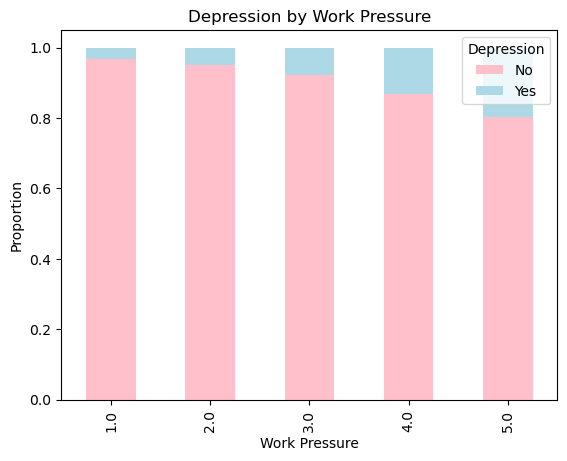

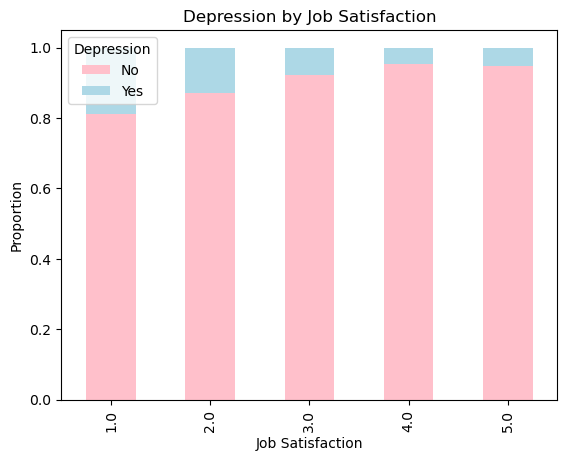

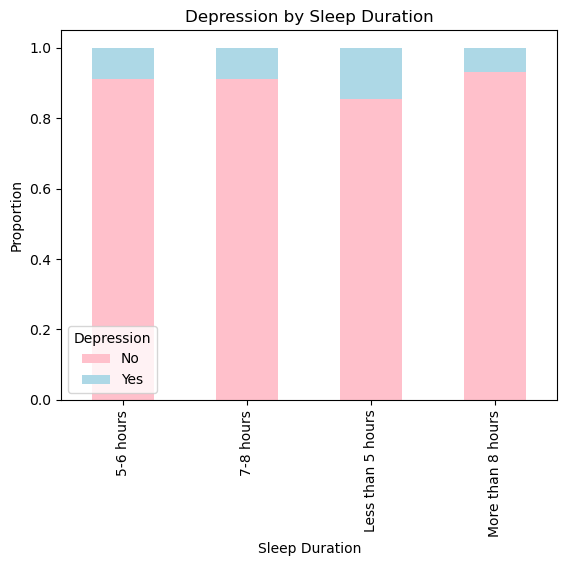

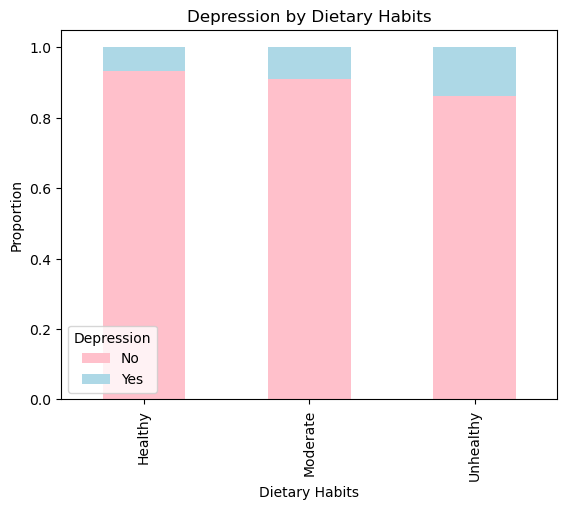

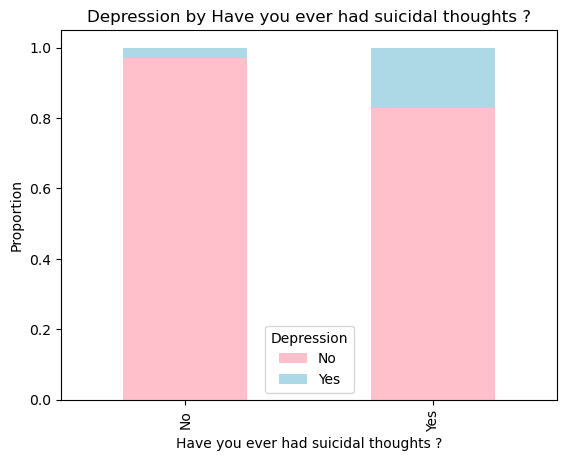

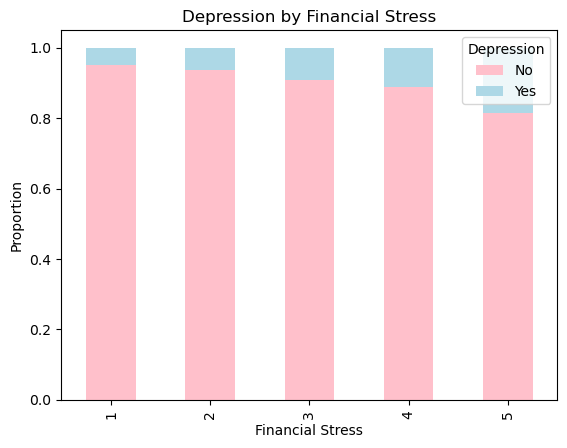

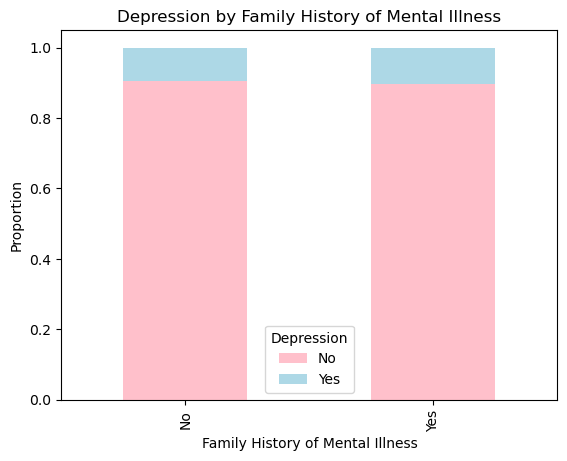

In [28]:
# Loop through each feature and create a stacked bar plot for 'Depression' by each feature
for feature in features:
    cross_tab = pd.crosstab(data_wp[feature], data_wp['Depression'], normalize='index')
    
    cross_tab.plot(kind='bar', stacked=True, color=['pink', 'lightblue', 'red', 'brown'])

    plt.title(f'Depression by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    
    plt.show()

INFERENCES :
1. FAMILY MENTAL ILLNESS HISTORY IS NOT RELATED WITH AN INDIVIDUAL'S DEPRESSION.
2. MORE FINANCIAL STRESS LEADS TO MORE CHANCES OF DEPRESSION.
3. MOSTLY DEPRESSED PEOPLES WERE HAVING SUCIDAL THOUGHTS.
4. DEPRESSED PEOPLES HAVE UNHEALTHY DIET STYLE.
5. MORE WORK PRESSURE INCREASE THE CHANCES OF DEPRESSION.
6. MOSTLY DEPRESSED PEOPLES HAVE LOW JOB SATISFACTION

# **BIVARIATE ANALYSIS OF STUDENT'S DATA**

In [29]:
feat = ['Academic Pressure','Study Satisfaction', 'Sleep Duration','Dietary Habits', 'Have you ever had suicidal thoughts ?',
            'Financial Stress','Family History of Mental Illness']


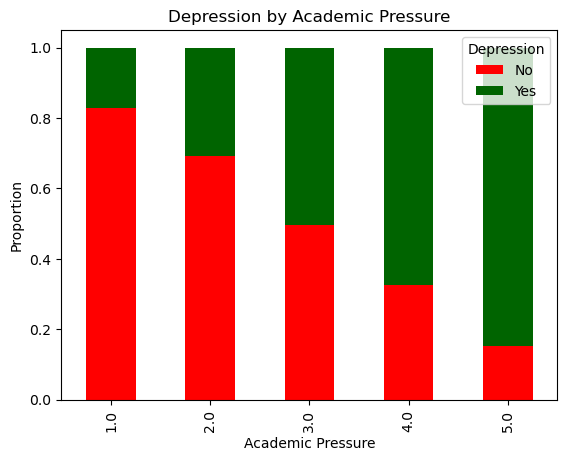

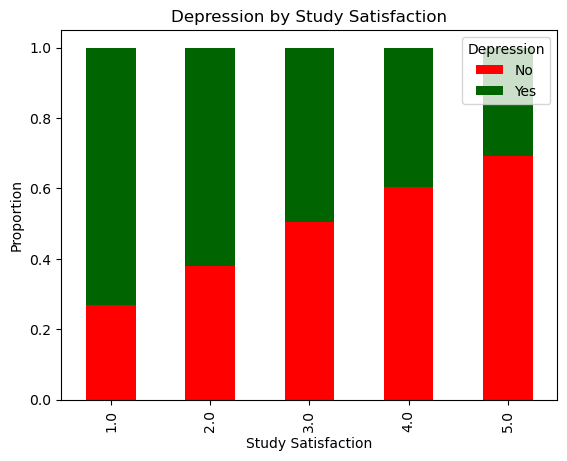

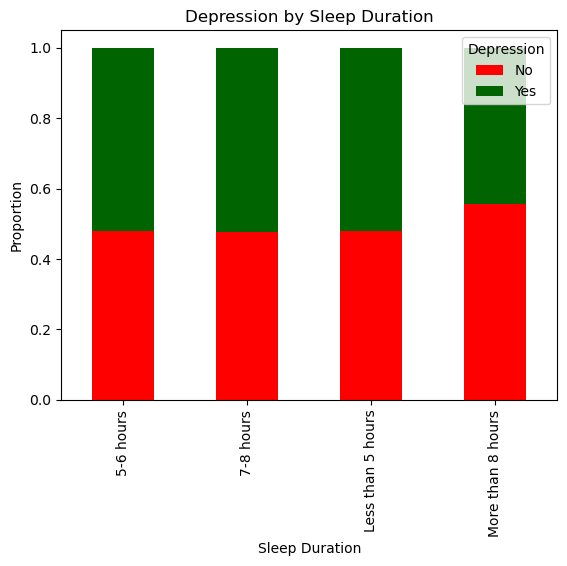

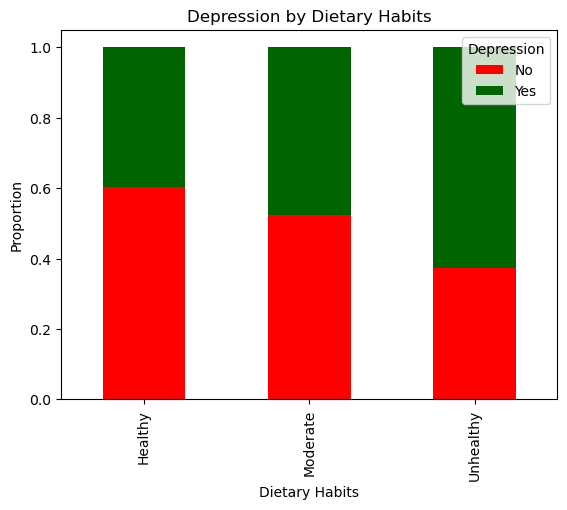

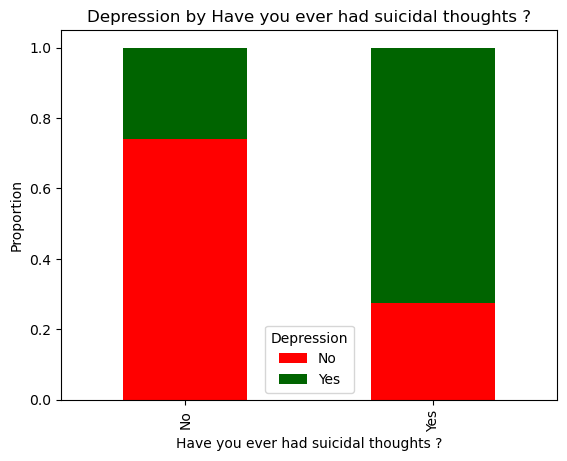

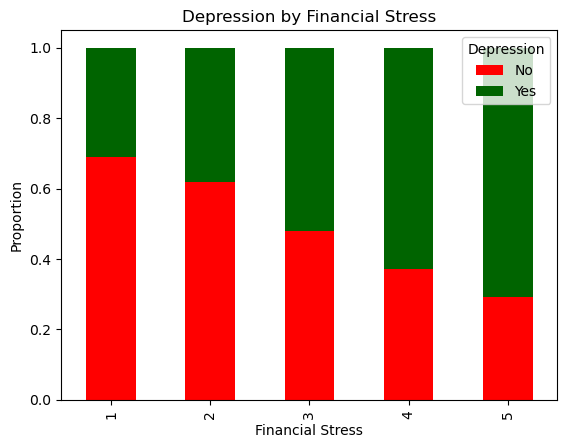

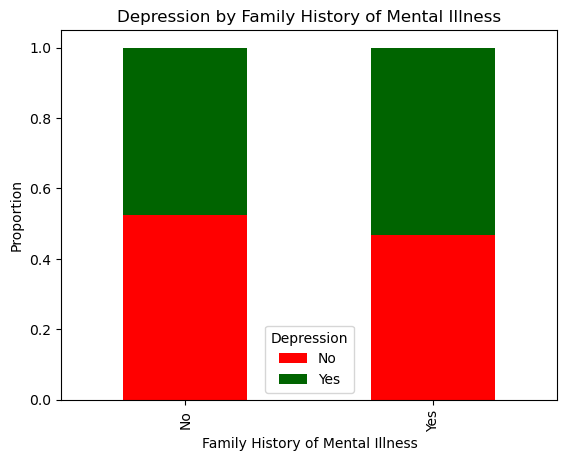

In [30]:
for feature in feat:
    cross_tab = pd.crosstab(data_stud[feature], data_stud['Depression'], normalize='index')
    
    cross_tab.plot(kind='bar', stacked=True, color=['red', 'darkgreen'])

    plt.title(f'Depression by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    
    plt.show()

INFERENCES :
1. FAMILY MENTAL ILLNESS HISTORY IS NOT RELATED WITH AN INDIVIDUAL'S DEPRESSION.
2. MORE FINANCIAL STRESS LEADS TO MORE CHANCES OF DEPRESSION.
3. MOSTLY DEPRESSED PEOPLES WERE HAVING SUCIDAL THOUGHTS.
4. DEPRESSED PEOPLES HAVE UNHEALTHY DIET STYLE.
5. MORE ACADMIC PRESSURE INCREASE THE CHANCES OF DEPRESSION.
6. MOSTLY DEPRESSED PEOPLES HAVE LOW STUDY SATISFACTION

## **NULL VALUE TREATMENT**

In [31]:
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


In [32]:
data['Academic Pressure'] = data['Academic Pressure'].fillna(0)
data['Study Satisfaction'] = data['Study Satisfaction'].fillna(0)
data['Work Pressure'] = data['Work Pressure'].fillna(0)
data['Job Satisfaction'] = data['Job Satisfaction'].fillna(0)
data['Financial Stress'] = data['Financial Stress'].fillna(0)
data['CGPA'] = data['CGPA'].fillna(0)


In [33]:
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,0.0,2.0,0.0,0.0,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,0.0,4.0,0.0,0.0,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,0.0,2.0,0.0,0.0,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,0.0,3.0,0.0,0.0,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,0.0,4.0,0.0,0.0,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No


ALL THE NULL VALUES ARE TREATED NOW EXCEPT PROFESSION COLUMN

## **FEATURE CREATION**

In [34]:
data['Work/Acadmic Pressure'] = data['Academic Pressure'] + data['Work Pressure']
data['Study/Job Satisfaction'] = data['Study Satisfaction'] + data['Job Satisfaction']

In [35]:
data.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,...,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work/Acadmic Pressure,Study/Job Satisfaction
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,0.0,2.0,0.0,0.0,...,7-8 hours,Moderate,MA,No,6,2,No,No,2.0,4.0
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,0.0,4.0,0.0,0.0,...,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,4.0,3.0
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,0.0,2.0,0.0,0.0,...,5-6 hours,Moderate,M.Com,No,0,2,No,No,2.0,3.0
3,Isha,Female,44,Thane,Working Professional,Teacher,0.0,3.0,0.0,0.0,...,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,3.0,5.0
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,0.0,4.0,0.0,0.0,...,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,4.0,3.0


In [36]:
data.isnull().sum()

Name                                       0
Gender                                     0
Age                                        0
City                                       0
Working Professional or Student            0
Profession                               673
Academic Pressure                          0
Work Pressure                              0
CGPA                                       0
Study Satisfaction                         0
Job Satisfaction                           0
Sleep Duration                             0
Dietary Habits                             0
Degree                                     0
Have you ever had suicidal thoughts ?      0
Work/Study Hours                           0
Financial Stress                           0
Family History of Mental Illness           0
Depression                                 0
Work/Acadmic Pressure                      0
Study/Job Satisfaction                     0
dtype: int64

## **DATA PREPROCESSING**

In [37]:
data['Profession'].unique()

array(['Teacher', 'Financial Analyst', 'UX/UI Designer', 'Civil Engineer',
       'Accountant', 'Lawyer', 'Content Writer', nan, 'Pilot',
       'Customer Support', 'Judge', 'Architect', 'HR Manager',
       'Digital Marketer', 'Sales Executive', 'Business Analyst',
       'Mechanical Engineer', 'Consultant', 'Data Scientist',
       'Pharmacist', 'Software Engineer', 'Travel Consultant', 'Manager',
       'Entrepreneur', 'Doctor', 'Researcher', 'Plumber',
       'Finanancial Analyst', 'Marketing Manager',
       'Educational Consultant', 'Chemist', 'Research Analyst', 'Chef',
       'Electrician', 'Graphic Designer', 'Investment Banker'],
      dtype=object)

In [38]:
chi2contingency = pd.crosstab(data['Profession'], data['Depression'])
chi2contingency

Depression,No,Yes
Profession,,
Accountant,15,2
Architect,64,9
Business Analyst,65,6
Chef,54,5
Chemist,58,1
Civil Engineer,28,3
Consultant,67,5
Content Writer,112,4
Customer Support,39,2


In [39]:
Ho = 'Profession does not have any significant relation with Target variable'
Ha =  'Profession have some significant relation with Target variable'

test_stat, pval, dof, _ = stats.chi2_contingency(chi2contingency)

if pval < 0.05:
    print('we reject the null hypothesis')
    print(Ha)
else:
    print('we fail to rejct the null hypothesis')
    print(Ho)

we fail to rejct the null hypothesis
Profession does not have any significant relation with Target variable


ONLY PROFESSION COLUMN HAVE NULL VALUES IT ALSO DOESN'T SHOW ANY RELATION WITH TARGET VARIABLE SO LET'S REMOVE IT

### **DATA CLEANING** 

In [40]:
data.duplicated().sum()

0

In [41]:
data.drop(columns = ['Academic Pressure', 'Study Satisfaction', 'Work Pressure', 'Job Satisfaction', 'Profession'], inplace = True)

In [ ]:
data.head()

,Name,Gender,Age,City,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work/Acadmic Pressure,Study/Job Satisfaction
0,Pooja,Female,37,Ghaziabad,Working Professional,0.0,7-8 hours,Moderate,MA,No,6,2,No,No,2.0,4.0
1,Reyansh,Male,60,Kalyan,Working Professional,0.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No,4.0,3.0
2,Manvi,Female,42,Bhopal,Working Professional,0.0,5-6 hours,Moderate,M.Com,No,0,2,No,No,2.0,3.0
3,Isha,Female,44,Thane,Working Professional,0.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No,3.0,5.0
4,Aarav,Male,48,Indore,Working Professional,0.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No,4.0,3.0


In [43]:
# City is also irrelevent column so we can drop it

data.drop(columns = ['City'], inplace = True)

In [44]:
data['Degree'].unique() 

array(['MA', 'B.Com', 'M.Com', 'MD', 'BE', 'MCA', 'BA', 'LLM', 'BCA',
       'Class 12', 'B.Ed', 'M.Tech', 'LLB', 'B.Arch', 'ME', 'MBA',
       'M.Pharm', 'MBBS', 'PhD', 'BSc', 'MSc', 'MHM', 'BBA', 'BHM',
       'B.Tech', 'M.Ed', 'B.Pharm'], dtype=object)

A LOT OF CATEGORIES ARE PRESENT IN DEGREE COLUMN SO WE BIN THEM INTO SCHOOLING, UNDERGRADUATE, POSTGRADUATE AND PHD

In [45]:
education_mapping = {
    'Class 12': 'Schooling', 'B.Com': 'Undergraduate', 'BCA': 'Undergraduate', 'BA': 'Undergraduate', 
    'BBA': 'Undergraduate', 'BHM': 'Undergraduate', 'BSc': 'Undergraduate', 'B.Tech': 'Undergraduate', 
    'B.Pharm': 'Undergraduate', 'B.Arch': 'Undergraduate', 'BE': 'Undergraduate', 'BDS': 'Undergraduate',
    'MA': 'Postgraduate', 'M.Com': 'Postgraduate', 'M.Tech': 'Postgraduate', 'MBA': 'Postgraduate', 
    'MCA': 'Postgraduate', 'MSc': 'Postgraduate', 'PhD': 'PhD', 'MD': 'Postgraduate', 
    'M.Pharm': 'Postgraduate', 'LLM': 'Postgraduate', 'M.Ed': 'Postgraduate', 'ME': 'Postgraduate', 
    'MBBS': 'Undergraduate', 'LLB': 'Undergraduate', 'B.Ed': 'Undergraduate', 'BAMS': 'Undergraduate','MHM': 'Undergraduate'}

In [46]:
data['Degree'].value_counts()

Degree
Class 12    275
B.Com       115
B.Ed        112
MCA         108
BCA         103
MSc          95
MBA          95
BSc          94
BBA          92
BHM          90
B.Arch       89
BA           89
B.Pharm      88
M.Tech       85
M.Pharm      85
ME           84
LLM          84
BE           84
LLB          82
PhD          81
MHM          81
M.Ed         81
MA           79
MBBS         75
MD           74
B.Tech       71
M.Com        65
Name: count, dtype: int64

In [47]:
data['Degree'].map(education_mapping).value_counts()

Degree
Undergraduate    1265
Postgraduate      935
Schooling         275
PhD                81
Name: count, dtype: int64

In [48]:
data['Degree'] = data['Degree'].map(education_mapping)

In [49]:
data.set_index('Name', inplace = True)

In [50]:
data.tail(4)

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work/Acadmic Pressure,Study/Job Satisfaction
Name,,,,,,,,,,,,,,
Pihu,Female,23,Working Professional,0.0,Less than 5 hours,Moderate,Postgraduate,Yes,8,3,No,Yes,3.0,1.0
Sara,Female,24,Working Professional,0.0,Less than 5 hours,Moderate,Undergraduate,Yes,4,4,No,No,1.0,4.0
Eshita,Female,56,Working Professional,0.0,7-8 hours,Healthy,Undergraduate,No,4,5,Yes,No,2.0,3.0
Kiran,Male,18,Student,6.7,More than 8 hours,Unhealthy,Schooling,No,6,2,Yes,Yes,5.0,3.0


## **FEATURE ENCODING**

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [52]:
le = LabelEncoder()

data['Depression'] = le.fit_transform(data['Depression'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Family History of Mental Illness'] = le.fit_transform(data['Family History of Mental Illness'])
data['Working Professional or Student'] = le.fit_transform(data['Working Professional or Student'])
data['Have you ever had suicidal thoughts ?'] = le.fit_transform(data['Have you ever had suicidal thoughts ?'])


In [53]:
data['Sleep Duration'].value_counts()

dic = {'Less than 5 hours' : 0, '5-6 hours' : 1, '7-8 hours' : 2, 'More than 8 hours' : 3}  

data['Sleep Duration'] = data['Sleep Duration'].map(dic)

In [54]:
mapp = {'Healthy': 2, 'Unhealthy': 0, 'Moderate': 1}

data['Dietary Habits'] = data['Dietary Habits'].map(mapp)

In [55]:
mapdict = {'Schooling' : 0, 'Undergraduate': 1, 'Postgraduate': 2, 'PhD': 0}

data['Degree'] = data['Degree'].map(mapdict)

In [56]:
data.head(2)

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work/Acadmic Pressure,Study/Job Satisfaction
Name,,,,,,,,,,,,,,
Pooja,0,37,1,0.0,2,1,2,0,6,2,0,0,2.0,4.0
Reyansh,1,60,1,0.0,1,0,1,1,0,4,1,0,4.0,3.0


## **FEATURE SCALING**

In [57]:
sc = StandardScaler()

data_s = pd.DataFrame(sc.fit_transform(data), columns = data.columns, index = data.index)

In [58]:
data.head()

,Gender,Age,Working Professional or Student,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work/Acadmic Pressure,Study/Job Satisfaction
Name,,,,,,,,,,,,,,
Pooja,0,37,1,0.0,2,1,2,0,6,2,0,0,2.0,4.0
Reyansh,1,60,1,0.0,1,0,1,1,0,4,1,0,4.0,3.0
Manvi,0,42,1,0.0,1,1,2,0,0,2,0,0,2.0,3.0
Isha,0,44,1,0.0,2,2,2,1,1,2,1,0,3.0,5.0
Aarav,1,48,1,0.0,2,1,1,1,6,5,1,0,4.0,3.0


NOW DATa IS FULLY READY FOR MACHINE LEARNING MODELS

##  **TRAIN TEST SPLIT**


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [60]:
X = data_s.drop(columns = 'Depression')
Y = data['Depression']

In [61]:
X.isnull().sum()

Gender                                   0
Age                                      0
Working Professional or Student          0
CGPA                                     0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Work/Acadmic Pressure                    0
Study/Job Satisfaction                   0
dtype: int64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0, shuffle=True, stratify = Y)

print(f'''X_TRAIN SHAPE : {x_train.shape}
X_TEST SHAPE : {x_test.shape}
Y_TRAIN SHAPE : {y_train.shape}
Y_TEST SHAPE : {y_test.shape}''')


X_TRAIN SHAPE : (2044, 13)
X_TEST SHAPE : (512, 13)
Y_TRAIN SHAPE : (2044,)
Y_TEST SHAPE : (512,)


In [63]:
m = []
acc = []
pre = []
rec = []
f1 = []
kp = []
cf = []


def model_val(model,xtrain, ytrain, xtest, y_test):
    mod = model
    mod.fit(xtrain, ytrain)
    soft_pred = mod.predict_proba(xtest)[:,1]
    hard_pred = (soft_pred > 0.5).astype(int)

    print(f'''CLASSIFICATION REPORT : {classification_report(y_test, hard_pred)}
    CONFUSION MATRIX : {confusion_matrix(y_test, hard_pred)}
    Cohen Kappa Score : {cohen_kappa_score(y_test, hard_pred)}''')


    plt.figure(figsize = (10,5))
    fpr, tpr, _ = roc_curve(y_test, soft_pred)
    plt.plot(fpr, tpr,  label = model)
    plt.plot([0,1], [0,1], linestyle = '--', color = 'red')
    plt.title(f'ROC-AUC SCORE : {roc_auc_score(y_test, soft_pred)}')
    plt.legend()
    plt.show()


    response = input('Do you want to save this model ? (y/n) : ')
    if response.lower() == 'y':
        global Scoreline
        m.append(model)
        acc.append(accuracy_score(y_test, hard_pred))
        pre.append(precision_score(y_test, hard_pred))
        rec.append(recall_score(y_test, hard_pred))
        f1.append(f1_score(y_test, hard_pred))
        kp.append(cohen_kappa_score(y_test, hard_pred))
        cf.append(confusion_matrix(y_test, hard_pred))



        Scoreline = pd.DataFrame({'Model' : m, 'Accuracy' : acc, 'Precision' : pre, 'Recall' : rec, 'F1 Score' : f1, 'Kappa Score' : kp})
        
    else:
        pass

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.99      0.99      0.99       421
           1       0.94      0.93      0.94        91

    accuracy                           0.98       512
   macro avg       0.97      0.96      0.96       512
weighted avg       0.98      0.98      0.98       512

    CONFUSION MATRIX : [[416   5]
 [  6  85]]
    Cohen Kappa Score : 0.9261783673255387


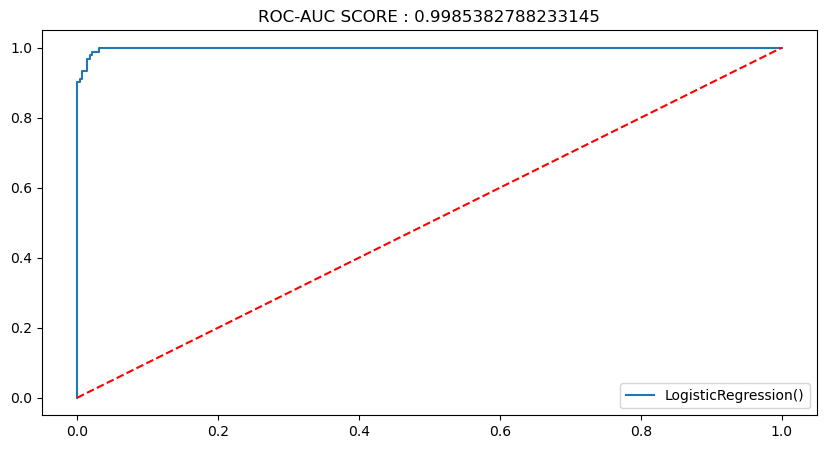

In [64]:
model_val(LogisticRegression(), x_train, y_train, x_test, y_test)

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.94      0.98      0.96       421
           1       0.86      0.69      0.77        91

    accuracy                           0.93       512
   macro avg       0.90      0.83      0.86       512
weighted avg       0.92      0.93      0.92       512

    CONFUSION MATRIX : [[411  10]
 [ 28  63]]
    Cohen Kappa Score : 0.7247389717325485


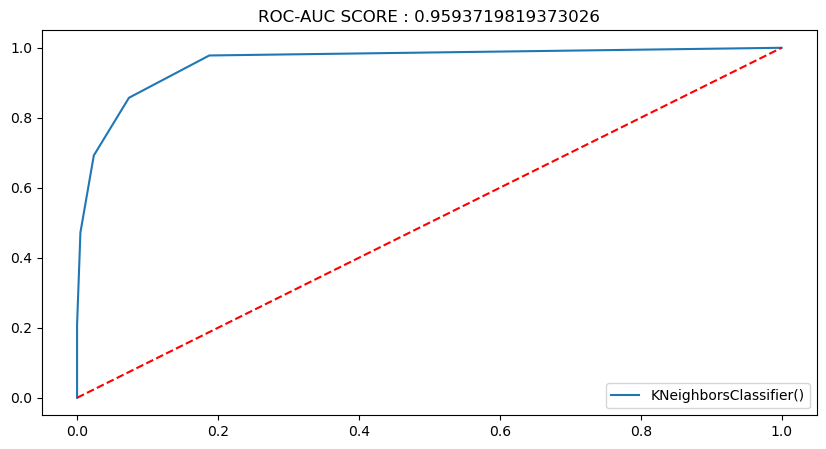

In [84]:
model_val(KNeighborsClassifier(), x_train, y_train, x_test, y_test)

In [85]:
Scoreline

,Model,Accuracy,Precision,Recall,F1 Score,Kappa Score
0,KNeighborsClassifier(),0.925781,0.863014,0.692308,0.768293,0.724739
1,GaussianNB(),0.830078,0.518868,0.604396,0.558376,0.453930
2,BernoulliNB(),0.837891,0.545455,0.527473,0.536313,0.438121
3,DecisionTreeClassifier(),0.916016,0.792683,0.714286,0.751445,0.701081
4,"DecisionTreeClassifier(criterion='entropy', ma...",0.916016,0.863636,0.626374,0.726115,0.677997
5,"(DecisionTreeClassifier(max_features='sqrt', r...",0.957031,0.948052,0.802198,0.869048,0.843560
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.972656,0.987342,0.857143,0.917647,0.901351
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.986328,0.988372,0.934066,0.960452,0.952195
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.974609,0.987500,0.868132,0.923977,0.908812
9,KNeighborsClassifier(),0.925781,0.863014,0.692308,0.768293,0.724739


CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.91      0.88      0.89       421
           1       0.52      0.60      0.56        91

    accuracy                           0.83       512
   macro avg       0.72      0.74      0.73       512
weighted avg       0.84      0.83      0.84       512

    CONFUSION MATRIX : [[370  51]
 [ 36  55]]
    Cohen Kappa Score : 0.4539302701907517


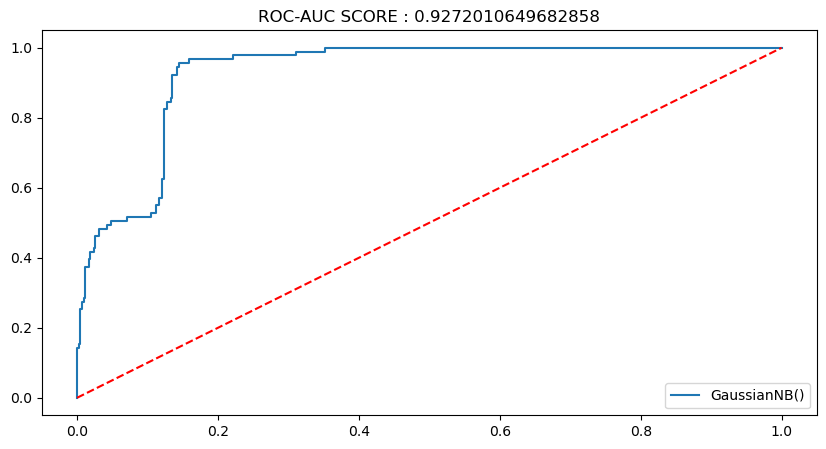

In [68]:
model_val(GaussianNB(), x_train, y_train, x_test, y_test)   

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.90      0.90      0.90       421
           1       0.55      0.53      0.54        91

    accuracy                           0.84       512
   macro avg       0.72      0.72      0.72       512
weighted avg       0.84      0.84      0.84       512

    CONFUSION MATRIX : [[381  40]
 [ 43  48]]
    Cohen Kappa Score : 0.4381214300825048


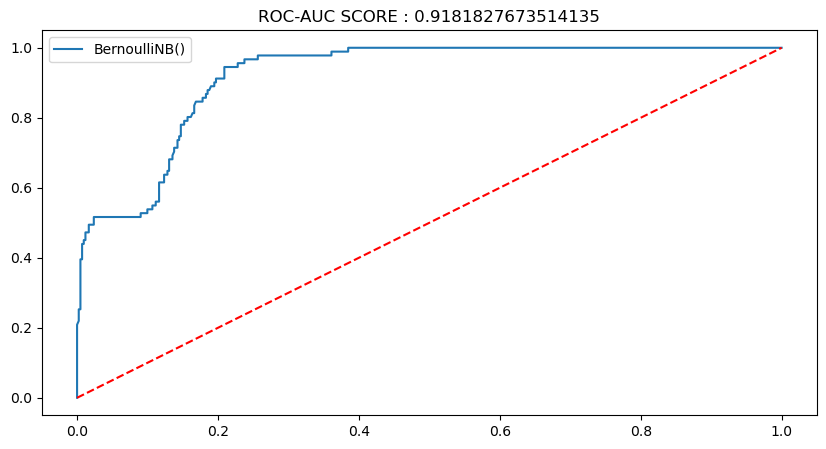

In [69]:
model_val(BernoulliNB(), x_train, y_train, x_test, y_test)

In [70]:
Scoreline

,Model,Accuracy,Precision,Recall,F1 Score,Kappa Score
0,KNeighborsClassifier(),0.925781,0.863014,0.692308,0.768293,0.724739
1,GaussianNB(),0.830078,0.518868,0.604396,0.558376,0.453930
2,BernoulliNB(),0.837891,0.545455,0.527473,0.536313,0.438121


CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.94      0.96      0.95       421
           1       0.79      0.71      0.75        91

    accuracy                           0.92       512
   macro avg       0.87      0.84      0.85       512
weighted avg       0.91      0.92      0.91       512

    CONFUSION MATRIX : [[404  17]
 [ 26  65]]
    Cohen Kappa Score : 0.7010807581599956


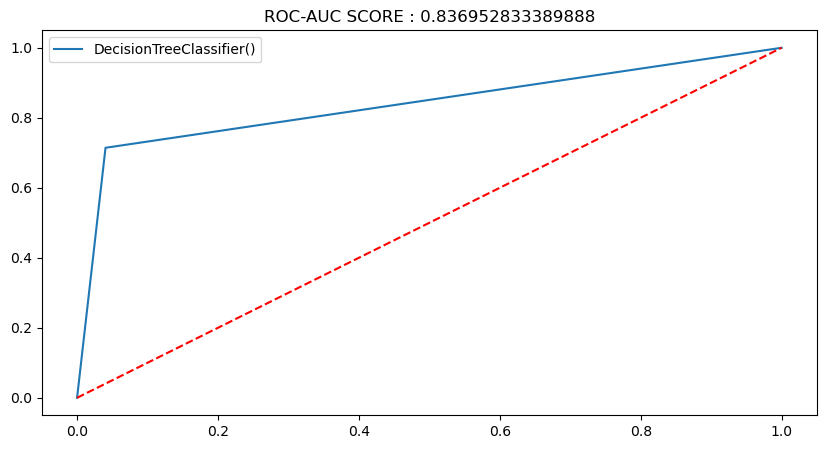

In [71]:
model_val(DecisionTreeClassifier(), x_train, y_train, x_test, y_test)

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.92      0.98      0.95       421
           1       0.86      0.63      0.73        91

    accuracy                           0.92       512
   macro avg       0.89      0.80      0.84       512
weighted avg       0.91      0.92      0.91       512

    CONFUSION MATRIX : [[412   9]
 [ 34  57]]
    Cohen Kappa Score : 0.6779968408120283


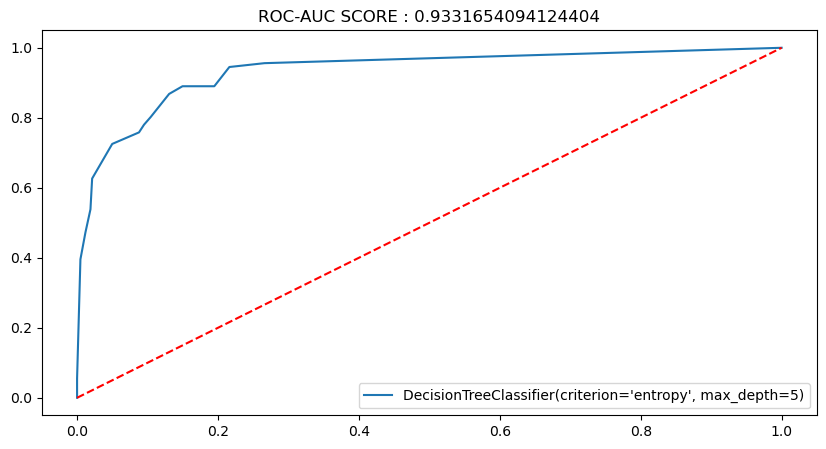

In [72]:
model_val(DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion='entropy'), x_train, y_train, x_test, y_test)

In [73]:
Scoreline

,Model,Accuracy,Precision,Recall,F1 Score,Kappa Score
0,KNeighborsClassifier(),0.925781,0.863014,0.692308,0.768293,0.724739
1,GaussianNB(),0.830078,0.518868,0.604396,0.558376,0.453930
2,BernoulliNB(),0.837891,0.545455,0.527473,0.536313,0.438121
3,DecisionTreeClassifier(),0.916016,0.792683,0.714286,0.751445,0.701081
4,"DecisionTreeClassifier(criterion='entropy', ma...",0.916016,0.863636,0.626374,0.726115,0.677997


CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.96      0.99      0.97       421
           1       0.95      0.80      0.87        91

    accuracy                           0.96       512
   macro avg       0.95      0.90      0.92       512
weighted avg       0.96      0.96      0.96       512

    CONFUSION MATRIX : [[417   4]
 [ 18  73]]
    Cohen Kappa Score : 0.8435599011138579


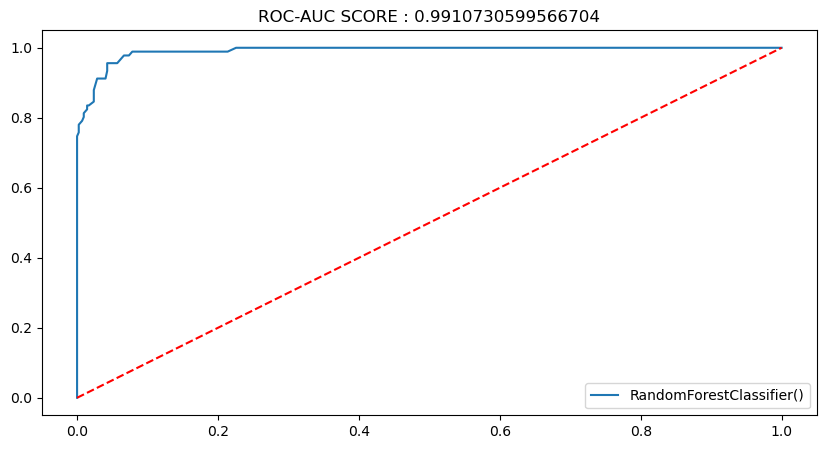

In [74]:
model_val(RandomForestClassifier(), x_train, y_train, x_test, y_test)   

In [75]:
Scoreline

,Model,Accuracy,Precision,Recall,F1 Score,Kappa Score
0,KNeighborsClassifier(),0.925781,0.863014,0.692308,0.768293,0.724739
1,GaussianNB(),0.830078,0.518868,0.604396,0.558376,0.453930
2,BernoulliNB(),0.837891,0.545455,0.527473,0.536313,0.438121
3,DecisionTreeClassifier(),0.916016,0.792683,0.714286,0.751445,0.701081
4,"DecisionTreeClassifier(criterion='entropy', ma...",0.916016,0.863636,0.626374,0.726115,0.677997
5,"(DecisionTreeClassifier(max_features='sqrt', r...",0.957031,0.948052,0.802198,0.869048,0.843560


CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.97      1.00      0.98       421
           1       0.99      0.86      0.92        91

    accuracy                           0.97       512
   macro avg       0.98      0.93      0.95       512
weighted avg       0.97      0.97      0.97       512

    CONFUSION MATRIX : [[420   1]
 [ 13  78]]
    Cohen Kappa Score : 0.9013514629379868


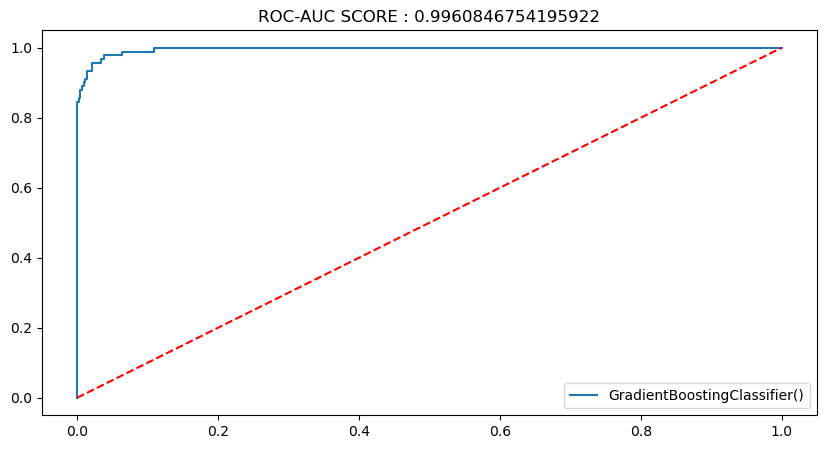

In [76]:
model_val(GradientBoostingClassifier(), x_train, y_train, x_test, y_test)

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.99      1.00      0.99       421
           1       0.99      0.93      0.96        91

    accuracy                           0.99       512
   macro avg       0.99      0.97      0.98       512
weighted avg       0.99      0.99      0.99       512

    CONFUSION MATRIX : [[420   1]
 [  6  85]]
    Cohen Kappa Score : 0.9521954863148909


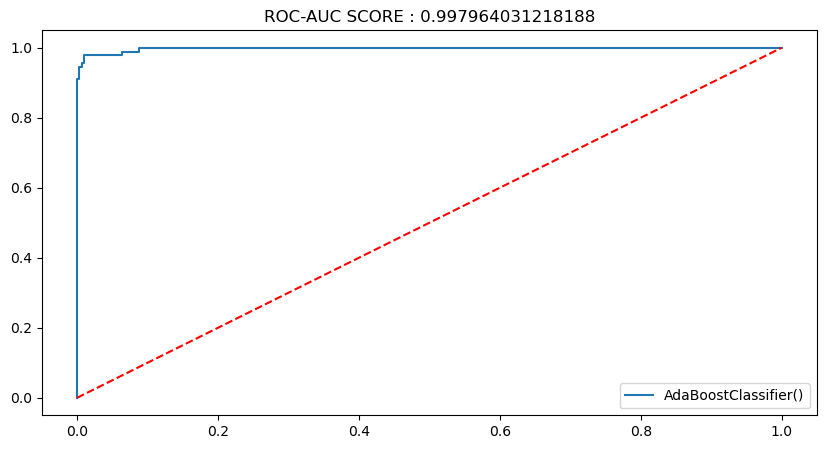

In [77]:
model_val(AdaBoostClassifier(), x_train, y_train, x_test, y_test)

CLASSIFICATION REPORT :               precision    recall  f1-score   support

           0       0.97      1.00      0.98       421
           1       0.99      0.87      0.92        91

    accuracy                           0.97       512
   macro avg       0.98      0.93      0.95       512
weighted avg       0.97      0.97      0.97       512

    CONFUSION MATRIX : [[420   1]
 [ 12  79]]
    Cohen Kappa Score : 0.9088119245944761


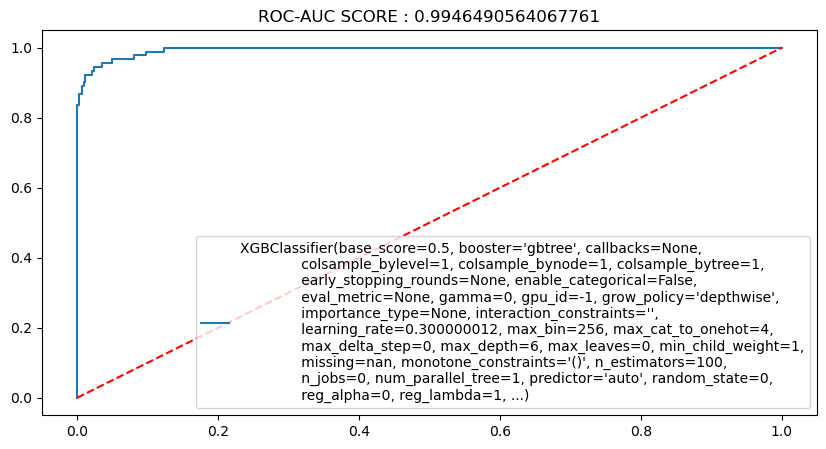

In [78]:
model_val(XGBClassifier(), x_train, y_train, x_test, y_test)

In [79]:
Scoreline

,Model,Accuracy,Precision,Recall,F1 Score,Kappa Score
0,KNeighborsClassifier(),0.925781,0.863014,0.692308,0.768293,0.724739
1,GaussianNB(),0.830078,0.518868,0.604396,0.558376,0.453930
2,BernoulliNB(),0.837891,0.545455,0.527473,0.536313,0.438121
3,DecisionTreeClassifier(),0.916016,0.792683,0.714286,0.751445,0.701081
4,"DecisionTreeClassifier(criterion='entropy', ma...",0.916016,0.863636,0.626374,0.726115,0.677997
5,"(DecisionTreeClassifier(max_features='sqrt', r...",0.957031,0.948052,0.802198,0.869048,0.843560
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.972656,0.987342,0.857143,0.917647,0.901351
7,"(DecisionTreeClassifier(max_depth=1, random_st...",0.986328,0.988372,0.934066,0.960452,0.952195
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.974609,0.987500,0.868132,0.923977,0.908812


In [80]:
final_model = AdaBoostClassifier()
final_model.fit(x_train.values, y_train)

AdaBoostClassifier()

## **BUSINESS INTERPRETATION**

In [81]:
df_of_Features = pd.DataFrame({'COLUMNS' : x_train.columns, 'SCORE' : final_model.feature_importances_, 'PERCENTAGE' : (final_model.feature_importances_)*100})

In [82]:
df_of_Features.sort_values(by = 'PERCENTAGE',ascending=False)

,COLUMNS,SCORE,PERCENTAGE
1,Age,0.22,22.0
11,Work/Acadmic Pressure,0.16,16.0
7,Have you ever had suicidal thoughts ?,0.12,12.0
12,Study/Job Satisfaction,0.12,12.0
9,Financial Stress,0.10,10.0
8,Work/Study Hours,0.08,8.0
3,CGPA,0.06,6.0
5,Dietary Habits,0.06,6.0
4,Sleep Duration,0.04,4.0
10,Family History of Mental Illness,0.04,4.0


In [83]:
import pickle

In [86]:
with open('final_model.pkl', 'wb') as file:
    pickle.dump(final_model,file)